# Week 12 Problem 2

A few things you should keep in mind when working on assignments:

1. Make sure you fill in any place that says `YOUR CODE HERE`. Do not write your answer in anywhere else other than where it says `YOUR CODE HERE`. Anything you write anywhere else will be removed or overwritten by the autograder.

2. Before you submit your assignment, make sure everything runs as expected. Go to menubar, select *Kernel*, and restart the kernel and run all cells (*Restart & Run all*).

3. Do not change the title (i.e. file name) of this notebook.

4. Make sure that you save your work (in the menubar, select *File* → *Save and CheckPoint*)

5. When you are ready to submit your assignment, go to *Dashboard* → *Assignments* and click the *Submit* button. Your work is not submitted until you click *Submit*.

6. You are allowed to submit an assignment multiple times, but only the most recent submission will be graded.

7. **If your code does not pass the unit tests, it will not pass the autograder.**

# Due Date: 6 PM, April 16, 2018

## Author: Kelechi Ikegwu
### Primary Reviewer: John Nguyen

In [1]:
from nose.tools import assert_equal, assert_true, assert_false, assert_almost_equal
import numpy.testing as npt
import networkx as nx

import matplotlib.pyplot as plt
% matplotlib inline

# prevent warnings from displaying
import warnings
warnings.filterwarnings('ignore')

# Make reproducible
import random
random.seed(0)

### Problem 2.1
Complete the function *create_graph* by creating a graph. Add nodes to your graph from n to m. If the add_edges parameter is true add edges to each proceeding and preceding node. 

Example:
This code
```python
create_graph(1, 6, add_edges=True)
```

should produce the following graph: ![1-6-edges.png](https://i.imgur.com/zzAXWms.png)

This code
```python
create_graph(1, 4, add_edges=False)
```

should produce the following graph: ![1-4-no-edges.png](https://i.imgur.com/HzX87lk.png)


In [29]:
def create_graph(n, m, add_edges=True):
    '''
    Parameters
    ----------
    n : integer of first node to start from.
    m : integer contains last node to stop at.
    add_edges: indicates whether you should connect each adjacent node.
    
    Returns
    -------
    
    graph of type networkx.classes.graph.Graph
    '''
    # YOUR CODE HERE
    g = nx.Graph()  
    g.add_nodes_from(range(n, m))
    if add_edges is True:
        edgs = []
        edgs.append((m, n))
        for idx in range(n, m):
            edgs.append((idx, idx+1))
        g.add_edges_from(edgs)
    return g

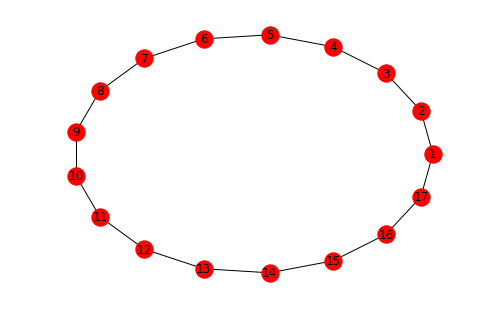

In [30]:
n = 1; m = 17
g = create_graph(n, m, add_edges=True)
assert_equal(type(g), type(nx.classes.graph.Graph()))  # Did you return a graph
nx.draw_circular(g, with_labels=True) # Drawing your graph
for i in nx.connected_components(g):
    assert_true(i == set([x for x in range(n, m+1)]))


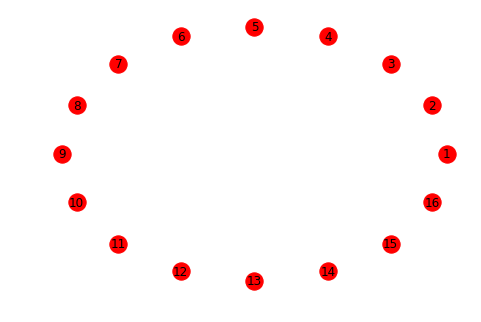

In [31]:
g2 = create_graph(n, m, add_edges=False)
assert_equal(type(g2), type(nx.classes.graph.Graph()))
nx.draw_circular(g2, with_labels=True) # Drawing graph without edges
for i in nx.connected_components(g2):
    assert_false(len(i) > 1) # Checking if you have multiple connected elements


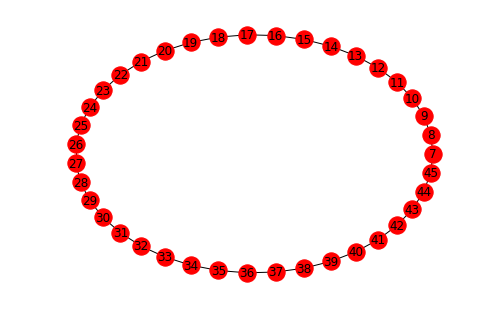

In [32]:
# Changing n and m
n = 7; m = 45
g3 = create_graph(n, m, add_edges=True)
assert_equal(type(g3), type(nx.classes.graph.Graph()))
nx.draw_circular(g3, with_labels=True) # Drawing graph with edges
for i in nx.connected_components(g3):
    assert_true(i == set([x for x in range(n, m+1)]))

### Problem 2.2

Complete the function *gen_graph* by generating a graph based on the *_type* passed in.
- if the _type is *complete* return a complete graph with n nodes.
- if the _type is *barbell* return a barbell graph with n nodes forming the left and right bells and connecting them with m nodes.
- if the _type is *lollipop* return a lollipop graph with n nodes forming a bell and connecting them with m nodes.
- otherwise return None


In [40]:
def gen_graph(_type = None, n = None, m=None):
    '''
    Parameters
    ----------
    _type : string containing type of graph to make
     n : integer containing number of nodes to use
     m : integer containing number of nodes to use
    add_edges: indicates whether you should connect each adjacent node.
    
    Returns
    -------
    
    graph of type networkx.classes.graph.Graph
    '''
    # YOUR CODE HERE
    if _type == 'complete':
        cg = nx.complete_graph(n) 
    elif _type == 'barbell':
        cg = nx.barbell_graph(n, m) 
    elif _type == 'lollipop':
        cg = nx.lollipop_graph(n, m)
    else:
        cg = None
    return cg

In [41]:
g4 = gen_graph()
assert_true(g4 == None)

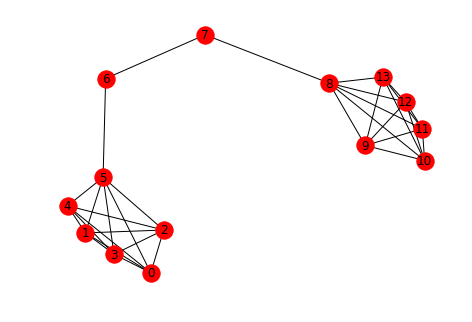

In [42]:
n = 6; m=2
g5 = gen_graph(_type = 'barbell', n=n, m=m)
nx.draw(g5, with_labels=True)
assert_true(type(g5) == type(nx.classes.graph.Graph()))
for i in nx.connected_components(g5):
    assert_equal(i, set([x for x in range(14)]))
    

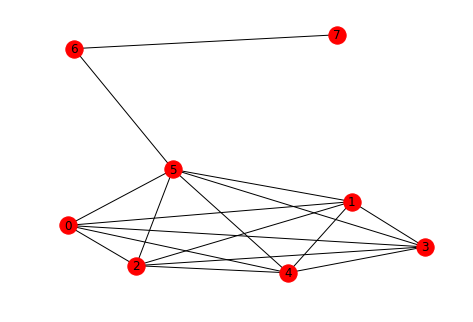

In [43]:
n = 6; m=2
g6 = gen_graph(_type = 'lollipop', n=n, m=m)
nx.draw(g6, with_labels=True)
assert_true(type(g6) == type(nx.classes.graph.Graph()))
for i in nx.connected_components(g6):
    assert_equal(i, set([x for x in range(n+m)]))
    

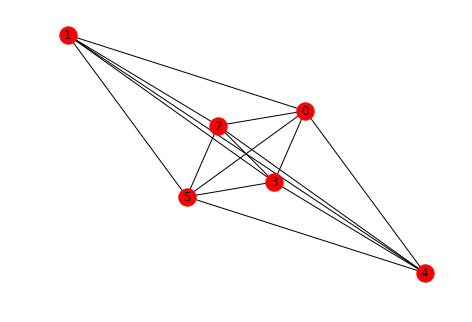

In [46]:
n = 6
g7 = gen_graph(_type = 'complete', n=n)
nx.draw(g7, with_labels=True)
assert_true(type(g7) == type(nx.classes.graph.Graph()))
for i in nx.connected_components(g7):
    assert_true(i == set([x for x in range(n)]))


### Problem 2.3
We'll use Zachary's Karate graph for this problem. You can access members of the Karate graph by doing the following:
``` python
>>> G = nx.karate_club_graph()
>>> G.node[0]["club"]
'Mr. Hi'

>>> G.node[9]["club"]
'Officer'
```

Complete the function *karate_club* by counting the number of memebers that are in Mr.Hi's or Officer's group or club. Return the number of members in Mr. Hi's group and Officer's group.

In [47]:
def karate_club(G):
    '''
    Parameters
    -------
    G - netwrokx.graph containing Zachary's Karate graph
    
    Returns
    -------
    
    n - integer containing number of members in Mr. Hi's group or club
    m - integer containing number of members in Officer's group or club
    '''
    # YOUR CODE HERE
    n = 0
    m = 0
    for i in range(G.order()):
        if G.node[i]['club']=='Mr. Hi':
            n+=1
        elif G.node[i]['club']=='Officer':
            m+=1
    return n, m 

In [48]:
try:
    _, _ = karate_club(None)
    assert_true(False, msg="Your function should make use of the karate_club graph")
except:
    pass

mhi, officer = karate_club(nx.karate_club_graph())
assert_equal(mhi, 17)
assert_equal(officer, 17)

print('Club\t\t\t\t Number of Members')
print('-'*51)
print('Mr. Hi\t\t\t\t\t %s'%mhi)
print('Officer\t\t\t\t\t %s'%officer)
print('\n\n')


g2 = nx.karate_club_graph()
for i in range(34, 45):
    g2.node[i] = {'club': 'Officer'}
for i in range(45, 55):
    g2.node[i] = {'club': 'Mr. Hi'}
mhi2, officer2 = karate_club(g2)

assert_equal(mhi2, 27)
assert_equal(officer2, 28)

print('Club\t\t\t\t Number of Members')
print('-'*51)
print('Mr. Hi\t\t\t\t\t %s'%mhi2)
print('Officer\t\t\t\t\t %s'%officer2)

Club				 Number of Members
---------------------------------------------------
Mr. Hi					 17
Officer					 17



Club				 Number of Members
---------------------------------------------------
Mr. Hi					 27
Officer					 28
